# Import packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler 

import warnings
warnings.simplefilter('ignore')

# Get Data

In [3]:
data = pd.read_csv('../data/jfk_weather_cleaned.csv')

In [4]:
df = data.copy()

In [5]:
df.head(2)

,DATE,VISIBILITY,DRYBULBTEMPF,WETBULBTEMPF,DewPointTempF,RelativeHumidity,WindSpeed,WindDirection,StationPressure,SeaLevelPressure,Precip
0,2010-01-01 00:51:00,6.0,33,32,31,92,0,0,29.97,29.99,0.01
1,2010-01-01 01:51:00,6.0,33,33,32,96,0,0,29.97,29.99,0.02


In [6]:
df.shape

(75083, 11)

# Missing values

In [13]:
df.isnull().sum().sort_values(ascending=False)

DATE                0
VISIBILITY          0
DRYBULBTEMPF        0
WETBULBTEMPF        0
DewPointTempF       0
RelativeHumidity    0
WindSpeed           0
WindDirection       0
StationPressure     0
SeaLevelPressure    0
Precip              0
dtype: int64

There are no missing values.

 # Categorical Vs. Numerical variables 

In [7]:
df.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('int64')], dtype=object)

In [8]:
df.dtypes.value_counts()

int64      6
float64    4
object     1
dtype: int64

In [9]:
cat_cols = [col for col in df.columns if df[col].dtypes == "O"]

#num_cols = [col for col in df.columns if (df[col].dtypes == "int64" or df[col].dtypes == "float64")]
num_cols = [col for col in df.columns if (df[col].dtypes != "O")]

In [10]:
len(cat_cols), len(num_cols)

(1, 10)

 # Visualizations

In [11]:
df.select_dtypes(include='object').head(2)

,DATE
0,2010-01-01 00:51:00
1,2010-01-01 01:51:00


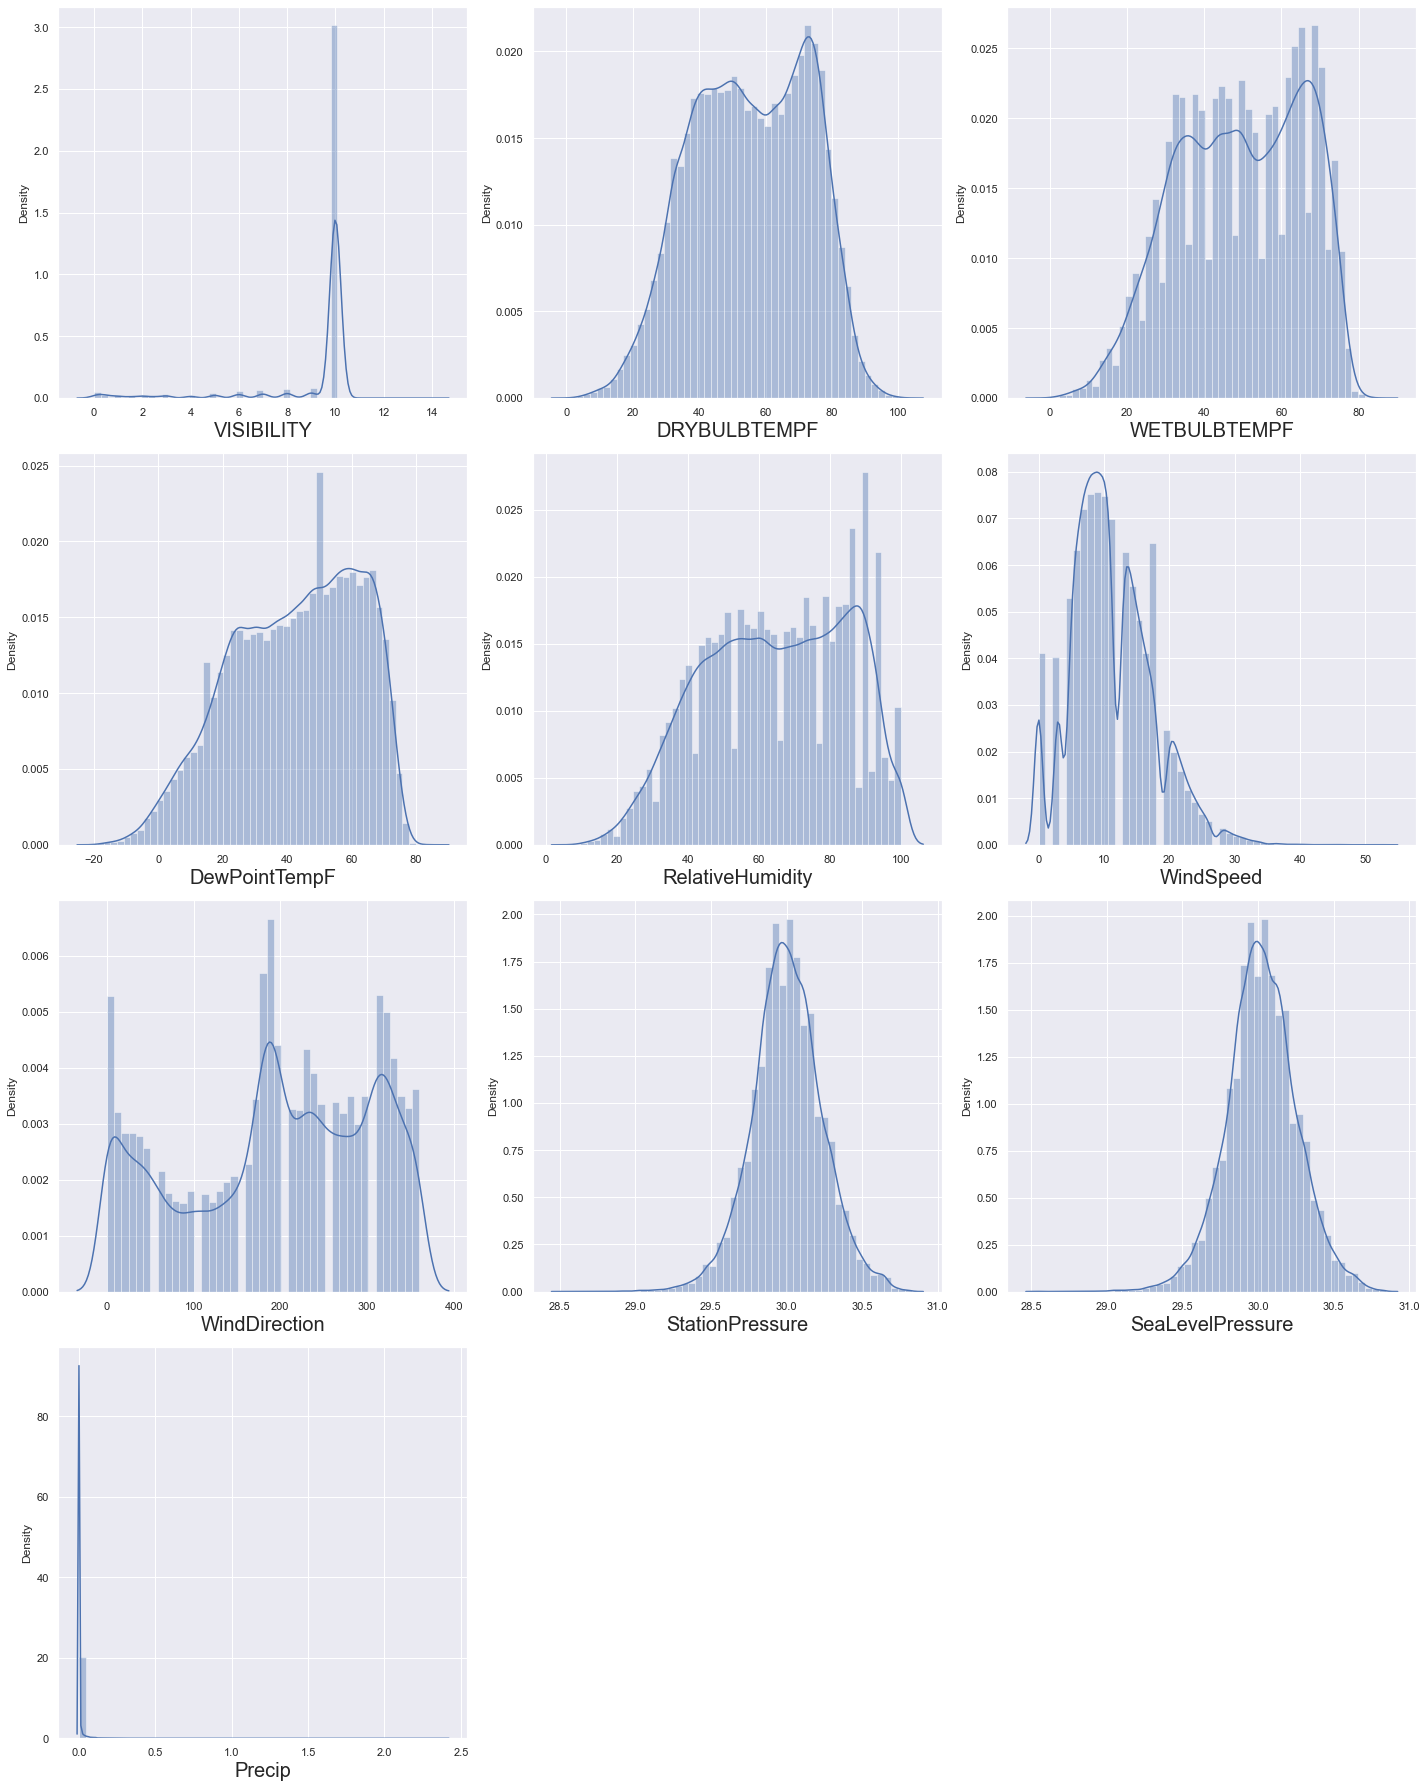

In [12]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in num_cols:
    ax = plt.subplot(4,3,plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Visibility Variable

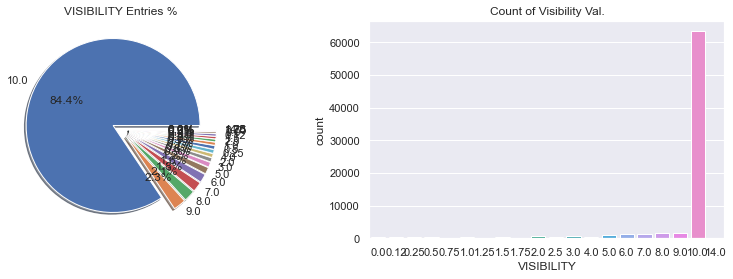

In [14]:
L = len(df['VISIBILITY'].value_counts())

fig, ax=plt.subplots(1,2,figsize=(14,4))

df['VISIBILITY'].value_counts().plot.pie(explode=L*[0.1],autopct='%1.1f%%',shadow=True,ax=ax[0])
ax[0].set_title("VISIBILITY Entries %")
ax[0].set_ylabel('')

sns.countplot(x = "VISIBILITY", data = df, ax=ax[1])
ax[1].set_title('Count of Visibility Val.')

plt.show()

# Scaling data

In [15]:
y = df['VISIBILITY']
X = df.drop(['DATE','VISIBILITY'],axis=1)

In [16]:
#let's scale our data
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [17]:
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

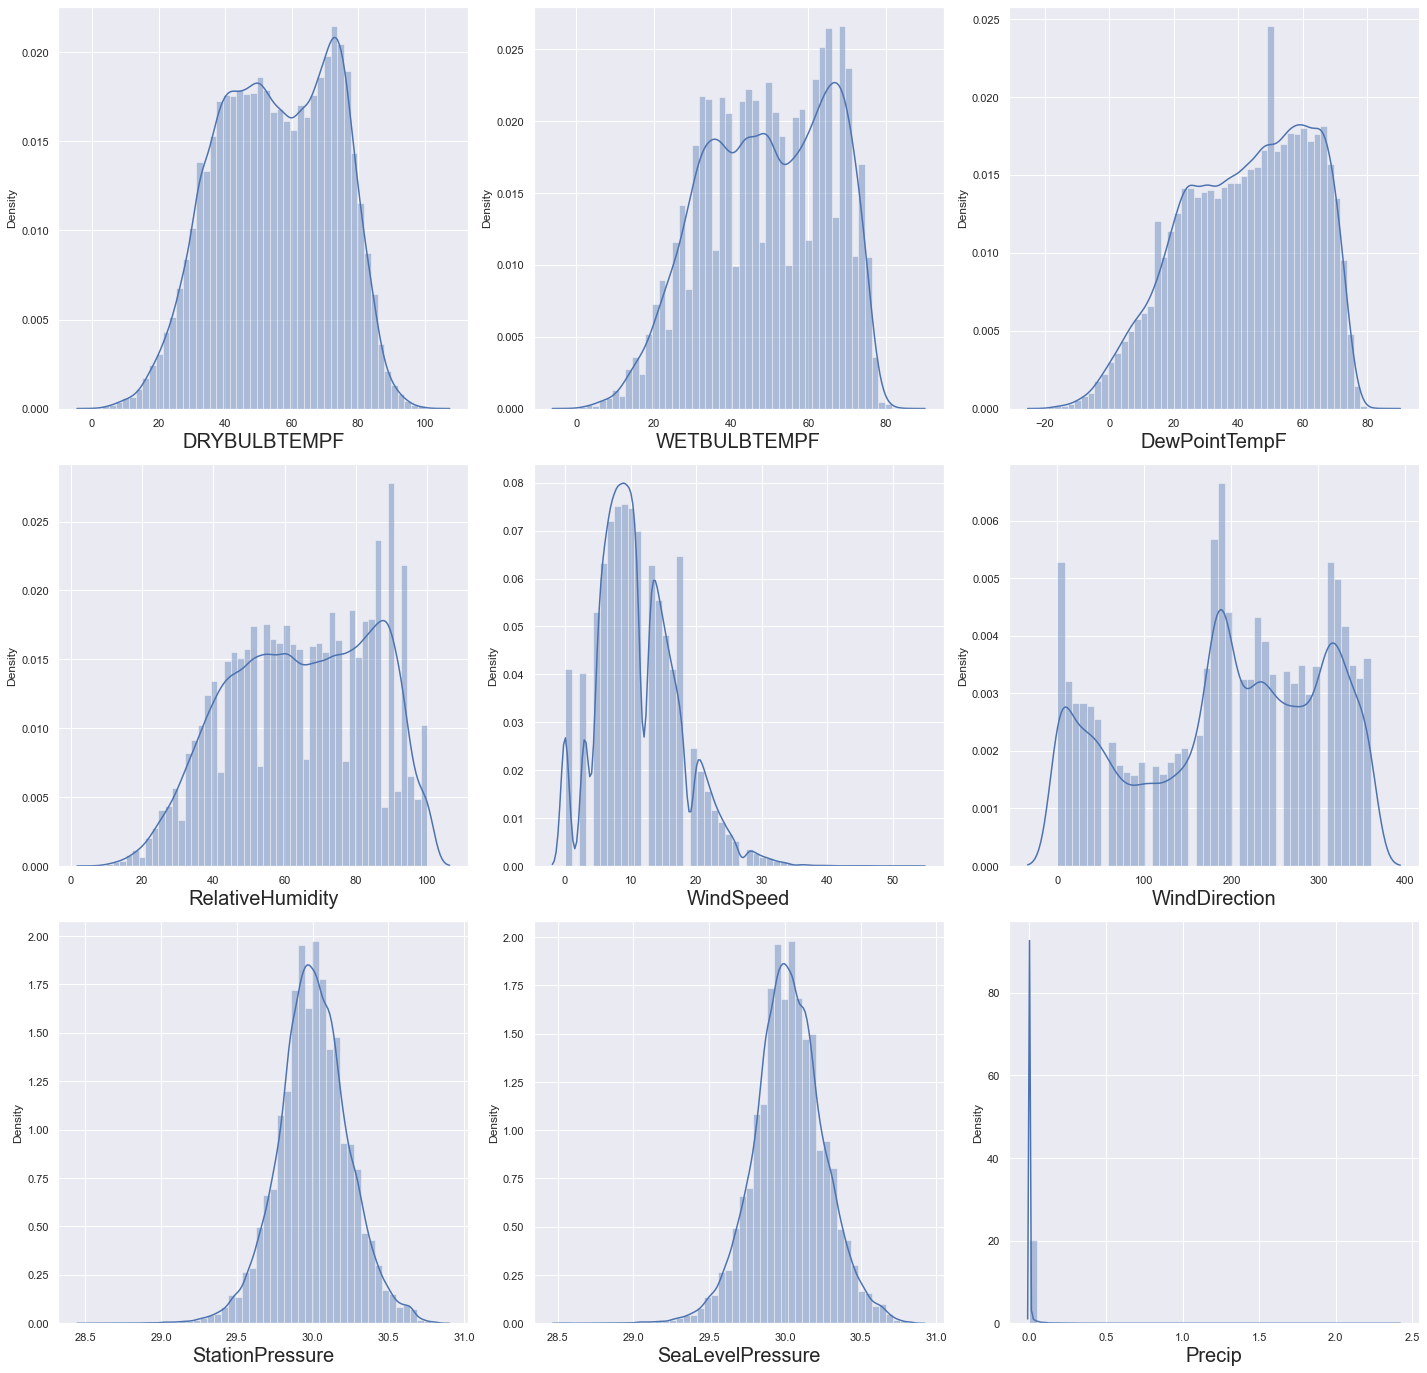

In [18]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    ax = plt.subplot(4,3,plotnumber)
    sns.distplot(X[column])
    plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

Some columns are not following normal distribution.

we will use such algorithms which do not require normal distribution such as decision tree and XGBoost.

Also, precipitation column has most of data value near 0. It won't be very useful for our analysis. 
Let's drop this column.

In [19]:
X_ = X.drop(['Precip'],axis=1)

# Correlations

Let's check correlation between the columns :

<AxesSubplot:>

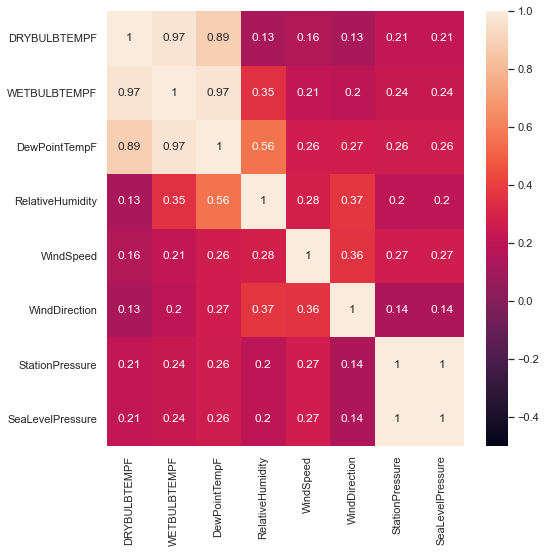

In [20]:
plt.figure(figsize=(8,8))
sns.heatmap(X_.corr().abs(), vmin = -0.5,vmax = 1,annot=True) 

There is clear correaltion between some columns.

Let's drop the columns with high correlaion.

In [21]:
X_f = X_.drop(['WETBULBTEMPF','DewPointTempF','StationPressure'],axis=1)

<AxesSubplot:>

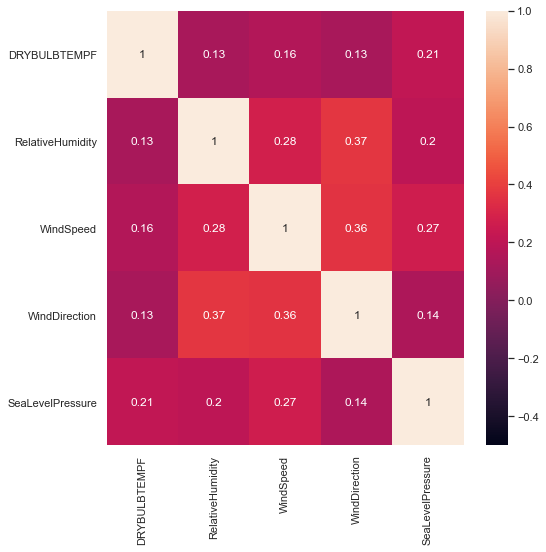

In [22]:
plt.figure(figsize=(8,8))
sns.heatmap(X_f.corr().abs(), vmin = -0.5,vmax = 1,annot=True) 

# Modeling

In [23]:
from sklearn.tree import DecisionTreeRegressor

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
scr = DecisionTreeRegressor()

In [28]:
# finding the best parameters

param_grid_knn = {"criterion" : ["mse", "mae"], # "friedman_mse", 
"splitter" : ["best", "random"],
"max_features" :["sqrt", "log2"], # "auto", 
'max_depth': range(2,6,2),
'min_samples_split': range(2,6,2)
                 }
    
grid =GridSearchCV(scr,param_grid_knn, verbose=3,cv=5)  

In [29]:
grid.fit(X_f, y)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END criterion=mse, max_depth=2, max_features=sqrt, min_samples_split=2, splitter=best;, score=0.214 total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=2, max_features=sqrt, min_samples_split=2, splitter=best;, score=0.520 total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=2, max_features=sqrt, min_samples_split=2, splitter=best;, score=0.054 total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=2, max_features=sqrt, min_samples_split=2, splitter=best;, score=0.362 total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=2, max_features=sqrt, min_samples_split=2, splitter=best;, score=0.108 total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=2, max_features=sqrt, min_samples_split=2, splitter=random;, score=0.279 total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=2, max_features=sqrt, min_samples_split=2, splitter=random;, score=0.006 total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=

[CV 3/5] END criterion=mse, max_depth=4, max_features=log2, min_samples_split=4, splitter=best;, score=0.479 total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=4, max_features=log2, min_samples_split=4, splitter=best;, score=0.459 total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=4, max_features=log2, min_samples_split=4, splitter=best;, score=0.151 total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=4, max_features=log2, min_samples_split=4, splitter=random;, score=0.306 total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=4, max_features=log2, min_samples_split=4, splitter=random;, score=0.331 total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=4, max_features=log2, min_samples_split=4, splitter=random;, score=0.199 total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=4, max_features=log2, min_samples_split=4, splitter=random;, score=0.023 total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=4, max_features=log2, min_samples_split=4, splitter=random

[CV 2/5] END criterion=mae, max_depth=4, max_features=sqrt, min_samples_split=4, splitter=random;, score=-0.038 total time=  22.9s
[CV 3/5] END criterion=mae, max_depth=4, max_features=sqrt, min_samples_split=4, splitter=random;, score=-0.116 total time=  13.6s
[CV 4/5] END criterion=mae, max_depth=4, max_features=sqrt, min_samples_split=4, splitter=random;, score=0.241 total time=  13.0s
[CV 5/5] END criterion=mae, max_depth=4, max_features=sqrt, min_samples_split=4, splitter=random;, score=-0.134 total time=  10.5s
[CV 1/5] END criterion=mae, max_depth=4, max_features=log2, min_samples_split=2, splitter=best;, score=0.267 total time=  34.2s
[CV 2/5] END criterion=mae, max_depth=4, max_features=log2, min_samples_split=2, splitter=best;, score=0.487 total time=  35.1s
[CV 3/5] END criterion=mae, max_depth=4, max_features=log2, min_samples_split=2, splitter=best;, score=-0.117 total time=  20.3s
[CV 4/5] END criterion=mae, max_depth=4, max_features=log2, min_samples_split=2, splitter=be

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': range(2, 6, 2),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': range(2, 6, 2),
                         'splitter': ['best', 'random']},
             verbose=3)

Great! Let's start with our model training.

In [30]:
grid.best_params_

{'criterion': 'mse',
 'max_depth': 4,
 'max_features': 'log2',
 'min_samples_split': 2,
 'splitter': 'best'}

In [31]:
import pickle

In [32]:
with open("../pickle_files/grid_best_params.pckl", "wb") as f:
    pickle.dump(grid.best_params_, f) 

In [33]:
grid.best_score_

0.4323867194567642

In [35]:
best_model = grid.best_estimator_
best_model

DecisionTreeRegressor(max_depth=4, max_features='log2')

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
best_model.fit(X,y)
res = cross_val_score(best_model, X, y, cv=5)
res                   

array([0.48522969, 0.51941887, 0.56628337, 0.4357683 , 0.17737888])

In [38]:
res.mean()

0.4368158228292452

In [39]:
with open("../pickle_files/DecisionTreeModel.pckl", "wb") as fmodel:
    pickle.dump([best_model, res.mean()], fmodel) 

In [ ]:
#END